For manipulated stock (ASM and GSM stock)

In [ ]:
import pandas as pd



# Read ASM list
asm_df = pd.read_csv("/content/asm-latest.csv")
asm_df = asm_df.dropna()

asm_symbols = asm_df['COMPANY NAME \n'].tolist()

# Read GSM list
gsm_df = pd.read_csv("/content/gsm-latest.csv")
gsm_symbols = gsm_df['COMPANY NAME \n'].tolist()

print("ASM Stocks:", asm_symbols)
print("GSM Stocks:", gsm_symbols)




ASM Stocks: ['3P Land Holdings Limited', 'Aaron Industries Limited', 'Aartech Solonics Limited', 'Aban Offshore Limited', 'Airo Lam limited', 'AksharChem India Limited', 'Alkali Metals Limited', 'Antarctica Limited', 'Archidply Industries Limited', 'Arvee Laboratories (India) Limited', 'Indef Manufacturing Limited', 'Solve Plastic Products Limited', 'Bang Overseas Limited', 'Banka BioLoo Limited', 'BGR Energy Systems Limited', 'Bohra Industries Limited', 'BPL Limited', 'BSE Limited', 'CCL Products (India) Limited', 'Centum Electronics Limited', 'Cochin Shipyard Limited', 'Data Patterns (India) Limited', 'FORCE MOTORS LTD', 'Garuda Construction and Engineering Limited', 'Grand Continent Hotels Limited', 'Garden Reach Shipbuilders & Engineers Limited', 'Hind Rectifiers Limited', 'Hubtown Limited', 'IFCI Limited', 'Indifra Limited', 'Indo Thai Securities Limited', 'InfoBeans Technologies Limited', 'Jayaswal Neco Industries Limited', 'Jeena Sikho Lifecare Limited', 'JSW Holdings Limited', 

In [ ]:
manipulated_stocks = list(set(asm_symbols + gsm_symbols))
manipulated_df = pd.DataFrame({"symbol": manipulated_stocks, "label": 1})

In [ ]:
manipulated_df.columns

Index(['symbol', 'label'], dtype='object')

In [ ]:

import requests

In [ ]:
!pip install --upgrade yfinance

In [ ]:
import pandas as pd

nifty50_symbols = [
    'ITC', 'SHRIRAMFIN', 'BEL', 'LT', 'ASIANPAINT', 'TRENT',
 'ULTRACEMCO', 'KOTAKBANK', 'SUNPHARMA', 'TATASTEEL',
 'POWERGRID', 'CIPLA', 'JIOFIN', 'BHARTIARTL', 'HINDALCO',
 'HEROMOTOCO', 'HCLTECH', 'MARUTI', 'BAJFINANCE', 'HINDUNILVR',
 'COALINDIA', 'SBIN', 'ETERNAL', 'ONGC', 'TATACONSUM',
 'BAJAJFINSV', 'HDFCLIFE', 'ADANIPORTS', 'ICICIBANK', 'GRASIM',
 'AXISBANK', 'TCS', 'DRREDDY', 'HDFCBANK', 'TITAN', 'EICHERMOT',
 'WIPRO', 'SBILIFE', 'TECHM', 'BAJAJ-AUTO', 'NESTLEIND',
 'INDUSINDBK', 'NTPC', 'JSWSTEEL', 'TATAMOTORS', 'ADANIENT',
 'APOLLOHOSP', 'INFY', 'RELIANCE', 'M&M'

]

df = pd.DataFrame({"symbol": nifty50_symbols, "label": 0})
print(df.head())



       symbol  label
0         ITC      0
1  SHRIRAMFIN      0
2         BEL      0
3          LT      0
4  ASIANPAINT      0


In [ ]:
dataset = pd.concat([manipulated_df, df], ignore_index=True)

print("Dataset Preview:")
print(dataset.head())
print("\nClass Distribution:")
print(dataset['label'].value_counts())

Dataset Preview:
                        symbol  label
0     Trident Techlabs Limited      1
1    Rajvir Industries Limited      1
2  Oil Country Tubular Limited      1
3     Prakash Steelage Limited      1
4     Sabar Flex India Limited      1

Class Distribution:
label
1    154
0     50
Name: count, dtype: int64


In [ ]:
dataset.sample(5)

,symbol,label
70,MT Educare Limited,1
120,Indo Thai Securities Limited,1
122,Shankara Building Products Limited,1
149,Alkali Metals Limited,1
13,IL&FS Engineering and Construction Company Lim...,1


In [ ]:
merged_df= dataset.drop_duplicates(subset=["symbol"], keep="first")

# ✅ Step 2: Shuffle all rows
merged_df = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# ✅ Step 3: (Optional) Check class distribution
print("Class balance:")
print(dataset["label"].value_counts())

# ✅ Step 4: Final dataset
print(merged_df.tail())

Class balance:
label
1    154
0     50
Name: count, dtype: int64
                              symbol  label
199  Shanthala FMCG Products Limited      1
200       Visu International Limited      1
201     Ortel Communications Limited      1
202                       BAJAJFINSV      0
203     Jeena Sikho Lifecare Limited      1


In [ ]:
# nse_companies = [c + ".NS" for c in nifty50_symbols]

# # Dictionary to store OHLCV data
# ohlcv_data = {}

# # Fetch last 3 years of daily OHLCV
# for ticker in nse_companies:
#     print(f"Fetching data for {ticker}...")
#     stock = yf.Ticker(ticker)
#     df = stock.history(period="3y", interval="1d")  # 3 years daily
#     if not df.empty:
#         ohlcv_data[ticker] = df

# # Example: access ITC data
# print("\nSample ITC data:")
# print(ohlcv_data['ITC.NS'].head())

# # Save each stock to CSV
# for ticker, df in ohlcv_data.items():
#     df.to_csv(f"{ticker}_3y_OHLCV.csv")

# print("\n✅ Data saved for all companies.")


In [ ]:

import yfinance as yf
import pandas as pd
import time
# Append .NS for NSE tickers
nse_companies = [c + ".NS" for c in nifty50_symbols]

# Dictionary to store data
ohlcv_data = {}
failed_tickers = []

# Fetch last 3 years of daily OHLCV
for ticker in nse_companies:
    try:
        print(f"Fetching data for {ticker}...")
        stock = yf.Ticker(ticker)
        df = stock.history(period="3y", interval="1d")

        if not df.empty:
            df.reset_index(inplace=True)  # reset index to keep Date as column
            df["Ticker"] = ticker
            ohlcv_data[ticker] = df
            # Save individual CSV
            df.to_csv(f"{ticker}_3y_OHLCV.csv", index=False)
        else:
            print(f"⚠️ No data found for {ticker}")
            failed_tickers.append(ticker)

        time.sleep(1)  # avoid rate limiting

    except Exception as e:
        print(f"❌ Failed to fetch {ticker}: {e}")
        failed_tickers.append(ticker)

# Combine into one dataset
if ohlcv_data:
    combined_df = pd.concat(ohlcv_data.values(), ignore_index=True)
    combined_df.to_csv("NIFTY50_3y_OHLCV_All.csv", index=False)
    print("\n✅ Combined data saved as NIFTY50_3y_OHLCV_All.csv")

if failed_tickers:
    print("\n⚠️ Failed tickers:", failed_tickers)

# Example: Show first rows of ITC
if 'ITC.NS' in ohlcv_data:
    print("\nSample ITC data:")
    print(ohlcv_data['ITC.NS'].head())

Fetching data for ITC.NS...
Fetching data for SHRIRAMFIN.NS...
Fetching data for BEL.NS...
Fetching data for LT.NS...
Fetching data for ASIANPAINT.NS...
Fetching data for TRENT.NS...
Fetching data for ULTRACEMCO.NS...
Fetching data for KOTAKBANK.NS...
Fetching data for SUNPHARMA.NS...
Fetching data for TATASTEEL.NS...
Fetching data for POWERGRID.NS...
Fetching data for CIPLA.NS...
Fetching data for JIOFIN.NS...
Fetching data for BHARTIARTL.NS...
Fetching data for HINDALCO.NS...
Fetching data for HEROMOTOCO.NS...
Fetching data for HCLTECH.NS...
Fetching data for MARUTI.NS...
Fetching data for BAJFINANCE.NS...
Fetching data for HINDUNILVR.NS...
Fetching data for COALINDIA.NS...
Fetching data for SBIN.NS...
Fetching data for ETERNAL.NS...
Fetching data for ONGC.NS...
Fetching data for TATACONSUM.NS...
Fetching data for BAJAJFINSV.NS...
Fetching data for HDFCLIFE.NS...
Fetching data for ADANIPORTS.NS...
Fetching data for ICICIBANK.NS...
Fetching data for GRASIM.NS...
Fetching data for AXIS

In [ ]:
data1=pd.read_csv("/content/NIFTY50_3y_OHLCV_All_Labeled.csv")

data1["label"] = 1
data1.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,label
36250,2025-08-25 00:00:00+05:30,3428.000000,3429.000000,3381.800049,3398.899902,1859862,0.0,0.0,M&M.NS,1
36251,2025-08-26 00:00:00+05:30,3395.000000,3414.000000,3318.100098,3330.800049,3122442,0.0,0.0,M&M.NS,1
36252,2025-08-27 00:00:00+05:30,3330.800049,3330.800049,3330.800049,3330.800049,0,0.0,0.0,M&M.NS,1
36253,2025-08-28 00:00:00+05:30,3375.000000,3375.000000,3287.300049,3295.300049,2936428,0.0,0.0,M&M.NS,1
36254,2025-08-29 00:00:00+05:30,3271.000000,3280.000000,3187.000000,3199.500000,3017625,0.0,0.0,M&M.NS,1


In [ ]:
data["label"] = 1

# Save the updated dataset
data.to_csv("NIFTY50_3y_OHLCV_All_Labeled.csv", index=False)

print("✅ Labels added successfully! File saved as NIFTY50_3y_OHLCV_All_Labeled.csv")
data.sample(20)

✅ Labels added successfully! File saved as NIFTY50_3y_OHLCV_All_Labeled.csv


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,label
35839,2023-12-26 00:00:00+05:30,1615.989640,1643.663032,1609.686774,1637.015503,1203594,0.0,0.0,M&M.NS,1
17267,2023-12-26 00:00:00+05:30,978.945354,1002.605665,978.748173,993.092224,1804990,0.0,0.0,TATACONSUM.NS,1
6347,2024-04-19 00:00:00+05:30,1486.362400,1509.373906,1485.078450,1503.942017,2536516,0.0,0.0,SUNPHARMA.NS,1
20656,2022-08-30 00:00:00+05:30,1642.188573,1663.623041,1642.188573,1650.496826,830049,0.0,0.0,GRASIM.NS,1
35194,2024-05-23 00:00:00+05:30,1447.834002,1481.261517,1444.310036,1475.131958,14608260,0.0,0.0,RELIANCE.NS,1
33827,2024-11-11 00:00:00+05:30,7380.102198,7434.106497,6963.824639,7136.209961,625620,0.0,0.0,APOLLOHOSP.NS,1
34203,2023-05-18 00:00:00+05:30,1178.667068,1179.650429,1163.542722,1166.867310,6948732,0.0,0.0,INFY.NS,1
22398,2023-09-12 00:00:00+05:30,3383.687209,3478.550510,3374.966365,3469.732910,4476016,0.0,0.0,TCS.NS,1
33463,2023-05-22 00:00:00+05:30,4428.817907,4592.870468,4421.022828,4573.307129,361967,0.0,0.0,APOLLOHOSP.NS,1
5077,2025-02-28 00:00:00+05:30,10423.925802,10423.925802,9984.560420,10064.653320,1230856,0.0,0.0,ULTRACEMCO.NS,1


In [ ]:
asm_symbols = [
    "3PLAND","AARON","AARTECH","ABAN","AIROLAM","AKSHARCHEM","ALKALI","ANTGRAPHIC","ARCHIDPLY","ARVEE",
    "BAJAJINDEF","BANG","BANKA","BGRENERGY","BOHRAIND","BPL","BSE","CCL","CENTUM","COCHINSHIP",
    "DATAPATTNS","FORCEMOT","GARUDA","GRSE","HIRECT","HUBTOWN","IFCI","INDIFRA","INDOTHAI",
    "INFOBEAN","JAYNECOIND","JSLL","JSWHL","KARNIKA","KITEX","KRISHANA","LANCORHOL","LGHL","LOKESHMACH",
    "LOTUSEYE","LPDC","LUMAXTECH","MANGCHEFER","MCLEODRUSS","MEGASTAR","MMTC","MODTHREAD","MOXSH","NACLIND",
    "NDRAUTO","NELCAST","NIBE","OILCOUNTUB","ORIENTBELL","PRAENG","QPOWER","RADAAN","RVHL","SABTNL","SATIPOLY",
    "SHANKARA","SHARDACROP","SMLISUZU","SRM","STALLION","STLTECH","SUBROS","SUNDRMBRAK","TECHLABS","TEMBO",
    "VINYAS","VR","ZUARI","AFFORDABLE","APOLLO","BCG","BLACKBUCK","CCCL","CPPLUS","FLEXITUFF",
    "FOSECOIND","HLEGLAS","KAUSHALYA","KINGFA","KIOCL","OLAELEC",
    "SABAR","SHANTHALA","SIGNPOST","SILGO","SPIC","SURANI","TAPIFRUIT","VIMTALABS","YATRA"
]
gsm_symbols = [
    "ALPSINDUS","ANKITMETAL","ARENTERP","ASIL","ATNINTER","BLUECHIP","CMICABLES","COMPINFO","EDUCOMP",
    "EMAMIREAL","EQUIPPP","EUROTEXIND","FEL","FELDVR","FLFL","FSC","GANGOTRI","GAYAPROJ","GFSTEELS",
    "GOLDENTOBC","GTL","HCL-INSYS","IL&FSENGG","IL&FSTRANS","IMPEXFERRO","INFOMEDIA","LAKPRE","LCCINFOTEC",
    "MEP","MORARJEE","MTEDUCARE","NOIDATOLL","OMKARCHEM","ORTEL","PRAKASHSTL","PREMIER","QUINTEGRA","RAJVIR",
    "REGENCERAM","RETAIL","SANCO","SETUINFRA","SHRENIK","SHYAMTEL","SUPREMEENG","TIJARIA","UNIVAFOODS",
    "VISUINTL","VIVIDHA","WILLAMAGOR","WINSOME","YAARI"
]


In [ ]:
all_symbols = asm_symbols + gsm_symbols
import yfinance as yf
import pandas as pd
import time
# Append .NS for NSE tickers
nse_companies = [c + ".NS" for c in all_symbols]

# Dictionary to store data
ohlcv_data = {}
failed_tickers = []

# Fetch last 3 years of daily OHLCV
for ticker in nse_companies:
    try:
        print(f"Fetching data for {ticker}...")
        stock = yf.Ticker(ticker)
        df = stock.history(period="3y", interval="1d")

        if not df.empty:
            df.reset_index(inplace=True)  # reset index to keep Date as column
            df["Ticker"] = ticker
            ohlcv_data[ticker] = df
            # Save individual CSV
            df.to_csv(f"{ticker}_3y_OHLCV.csv", index=False)
        else:
            print(f"⚠️ No data found for {ticker}")
            failed_tickers.append(ticker)

        time.sleep(1)  # avoid rate limiting

    except Exception as e:
        print(f"❌ Failed to fetch {ticker}: {e}")
        failed_tickers.append(ticker)

# Combine into one dataset
if ohlcv_data:
    combined_df = pd.concat(ohlcv_data.values(), ignore_index=True)
    combined_df.to_csv("ASM_GSM_3y_OHLCV_All.csv", index=False)
    print("\n✅ Combined data saved as NIFTY50_3y_OHLCV_All.csv")

if failed_tickers:
    print("\n⚠️ Failed tickers:", failed_tickers)

# Example: Show first rows of ITC
if 'ITC.NS' in ohlcv_data:
    print("\nSample AARON data:")
    print(ohlcv_data['AARON.NS'].head())

Fetching data for 3PLAND.NS...
Fetching data for AARON.NS...
Fetching data for AARTECH.NS...
Fetching data for ABAN.NS...
Fetching data for AIROLAM.NS...
Fetching data for AKSHARCHEM.NS...
Fetching data for ALKALI.NS...
Fetching data for ANTGRAPHIC.NS...
Fetching data for ARCHIDPLY.NS...
Fetching data for ARVEE.NS...
Fetching data for BAJAJINDEF.NS...
Fetching data for BANG.NS...
Fetching data for BANKA.NS...
Fetching data for BGRENERGY.NS...
Fetching data for BOHRAIND.NS...
Fetching data for BPL.NS...
Fetching data for BSE.NS...
Fetching data for CCL.NS...
Fetching data for CENTUM.NS...
Fetching data for COCHINSHIP.NS...
Fetching data for DATAPATTNS.NS...
Fetching data for FORCEMOT.NS...
Fetching data for GARUDA.NS...
Fetching data for GRSE.NS...
Fetching data for HIRECT.NS...
Fetching data for HUBTOWN.NS...
Fetching data for IFCI.NS...
Fetching data for INDIFRA.NS...
Fetching data for INDOTHAI.NS...
Fetching data for INFOBEAN.NS...
Fetching data for JAYNECOIND.NS...
Fetching data for

In [ ]:
data=pd.read_csv("/content/ASM_GSM_3y_OHLCV_All.csv")
data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Capital Gains
0,2022-08-29 00:00:00+05:30,17.900000,18.100000,16.700001,17.350000,8813,0.0,0.0,3PLAND.NS,NaN
1,2022-08-30 00:00:00+05:30,17.100000,17.950001,16.850000,17.700001,12034,0.0,0.0,3PLAND.NS,NaN
2,2022-09-01 00:00:00+05:30,17.700001,18.549999,17.100000,18.500000,27757,0.0,0.0,3PLAND.NS,NaN
3,2022-09-02 00:00:00+05:30,19.350000,19.350000,17.799999,18.000000,12530,0.0,0.0,3PLAND.NS,NaN
4,2022-09-05 00:00:00+05:30,18.549999,18.650000,17.900000,18.549999,6336,0.0,0.0,3PLAND.NS,NaN


In [ ]:
data["label"] = 0

# Save the updated dataset
data.to_csv("/content/ASM_GSM_3y_OHLCV_All.csv")

print("✅ Labels added successfully! File saved as ASM_GSM_3y_OHLCV_All_Labeled.csv")
data.head()

✅ Labels added successfully! File saved as ASM_GSM_3y_OHLCV_All_Labeled.csv


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Capital Gains,label
0,2022-08-29 00:00:00+05:30,17.900000,18.100000,16.700001,17.350000,8813,0.0,0.0,3PLAND.NS,NaN,0
1,2022-08-30 00:00:00+05:30,17.100000,17.950001,16.850000,17.700001,12034,0.0,0.0,3PLAND.NS,NaN,0
2,2022-09-01 00:00:00+05:30,17.700001,18.549999,17.100000,18.500000,27757,0.0,0.0,3PLAND.NS,NaN,0
3,2022-09-02 00:00:00+05:30,19.350000,19.350000,17.799999,18.000000,12530,0.0,0.0,3PLAND.NS,NaN,0
4,2022-09-05 00:00:00+05:30,18.549999,18.650000,17.900000,18.549999,6336,0.0,0.0,3PLAND.NS,NaN,0


In [ ]:

data.to_csv("/content/ASM_GSM_3y_OHLCV_All_label.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,label
0,2022-08-29 00:00:00+05:30,281.378451,285.871441,280.334634,284.600677,11361400,0.0,0.0,ITC.NS,1
1,2022-08-30 00:00:00+05:30,285.236014,291.725866,285.236014,290.908966,17829428,0.0,0.0,ITC.NS,1
2,2022-09-01 00:00:00+05:30,290.001305,292.179713,286.824452,288.276733,13254985,0.0,0.0,ITC.NS,1
3,2022-09-02 00:00:00+05:30,289.275205,294.312776,288.685196,293.314331,25758860,0.0,0.0,ITC.NS,1
4,2022-09-05 00:00:00+05:30,294.993493,299.168791,293.858903,298.488037,17471906,0.0,0.0,ITC.NS,1


In [ ]:
data1=pd.read_csv("/content/ASM_GSM_3y_OHLCV_All_label.csv")
data1.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/ASM_GSM_3y_OHLCV_All_label.csv'

In [ ]:
data.shape

(36255, 10)

In [ ]:
data1.shape

(36255, 10)

In [ ]:
final_df = pd.concat([data,data1], axis=0)

# 4. Reset index if needed
final_df.reset_index(inplace=True)

# 5. Save combined CSV
final_df.to_csv("All_Stocks_3y_OHLCV.csv", index=False)

print("✅ ASM/GSM + NIFTY50 data concatenated into 'All_Stocks_3y_OHLCV.csv'")

✅ ASM/GSM + NIFTY50 data concatenated into 'All_Stocks_3y_OHLCV.csv'


In [ ]:
from sklearn.utils import shuffle
final_df = shuffle(final_df, random_state=42).reset_index(drop=True)

# 5. Save combined and shuffled CSV
final_df.to_csv("All_Stocks_3y_OHLCV_Shuffled.csv", index=False)

In [ ]:
final_train_df=pd.read_csv("/content/All_Stocks_3y_OHLCV_Shuffled.csv")
final_train_df.sample(10)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,label
59991,28673,2025-01-20 00:00:00+05:30,8387.429427,8396.791758,8253.523332,8333.204102,294136,0.0,0.0,BAJAJ-AUTO.NS,1
12499,23242,2024-02-12 00:00:00+05:30,1231.708257,1262.163570,1230.858722,1251.307129,4296460,0.0,0.0,DRREDDY.NS,1
67026,11221,2023-12-20 00:00:00+05:30,3617.963285,3666.256565,3556.294301,3581.403076,595832,0.0,0.0,HEROMOTOCO.NS,1
30018,36131,2025-02-28 00:00:00+05:30,2673.620125,2677.488945,2551.699494,2564.496826,7549863,0.0,0.0,M&M.NS,1
51412,33411,2023-03-01 00:00:00+05:30,4371.071710,4415.113708,4307.119193,4383.137207,287008,0.0,0.0,APOLLOHOSP.NS,1
53480,6349,2024-04-23 00:00:00+05:30,1542.656493,1543.100872,1459.400399,1466.264404,9160422,0.0,0.0,SUNPHARMA.NS,1
52001,20585,2025-05-23 00:00:00+05:30,1431.157071,1440.683661,1423.416868,1438.698975,5203706,0.0,0.0,ICICIBANK.NS,1
57666,5765,2024-12-12 00:00:00+05:30,1787.938605,1794.381129,1763.316968,1766.663086,3488259,0.0,0.0,KOTAKBANK.NS,1
2398,7414,2025-08-07 00:00:00+05:30,157.149994,160.000000,156.259995,159.669998,23159540,0.0,0.0,TATASTEEL.NS,1
34788,27471,2023-03-08 00:00:00+05:30,994.973466,1002.712171,985.392217,993.407349,2230530,0.0,0.0,TECHM.NS,1


In [ ]:
nifty=pd.read_csv("/content/NIFTY50_3y_OHLCV_All_Labeled.csv")
nifty.sample(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,label
25518,2024-04-24 00:00:00+05:30,4437.652490,4463.672953,4408.165587,4423.690430,919636,0.0,0.0,EICHERMOT.NS,1
27842,2024-09-12 00:00:00+05:30,1576.670975,1605.578346,1563.141890,1599.397827,2356422,0.0,0.0,TECHM.NS,1
4504,2022-11-04 00:00:00+05:30,6646.454264,6844.107364,6623.640380,6778.271973,646411,0.0,0.0,ULTRACEMCO.NS,1
24965,2025-01-28 00:00:00+05:30,3309.390502,3360.735978,3289.649863,3315.920654,579957,0.0,0.0,TITAN.NS,1
31847,2022-11-10 00:00:00+05:30,414.341453,414.390709,403.206962,406.163025,26251660,0.0,0.0,TATAMOTORS.NS,1
3042,2022-12-09 00:00:00+05:30,3142.824828,3149.965499,3114.651128,3135.004150,847879,0.0,0.0,ASIANPAINT.NS,1
23135,2023-09-04 00:00:00+05:30,1103.426183,1119.567585,1102.151821,1118.135254,1473020,0.0,0.0,DRREDDY.NS,1
15901,2024-11-14 00:00:00+05:30,792.732297,801.898225,785.281862,788.418884,9461484,0.0,0.0,SBIN.NS,1
33025,2024-08-19 00:00:00+05:30,3120.454635,3132.698375,3091.369408,3100.964600,557265,0.0,0.0,ADANIENT.NS,1
11513,2025-02-24 00:00:00+05:30,3782.653212,3833.139813,3743.495313,3826.982910,272543,0.0,0.0,HEROMOTOCO.NS,1


In [ ]:
asm=pd.read_csv("/content/ASM_GSM_3y_OHLCV_All.csv",)
asm.sample(10)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Capital Gains,label
80051,80051,2025-07-03 00:00:00+05:30,7.810000,7.810000,7.810000,7.810000,0,0.0,0.0,INFOMEDIA.NS,NaN,0
24857,24857,2024-09-27 00:00:00+05:30,44.299999,44.580002,42.810001,43.240002,112983,0.0,0.0,LANCORHOL.NS,NaN,0
26213,26213,2024-03-20 00:00:00+05:30,313.000000,316.049988,298.000000,299.950012,50409,0.0,0.0,LOKESHMACH.NS,NaN,0
57951,57951,2025-01-14 00:00:00+05:30,67.660004,70.089996,67.099998,69.779999,424484,0.0,0.0,SPIC.NS,NaN,0
25619,25619,2024-10-28 00:00:00+05:30,278.000000,278.100006,278.000000,278.000000,17,0.0,0.0,LGHL.NS,NaN,0
40422,40422,2024-04-08 00:00:00+05:30,724.868297,726.556475,700.091980,705.106812,50048,0.0,0.0,SHANKARA.NS,NaN,0
8417,8417,2024-01-11 00:00:00+05:30,123.300003,129.550003,118.599998,129.550003,56683,0.0,0.0,BANKA.NS,NaN,0
67268,67268,2024-11-05 00:00:00+05:30,2.080000,2.080000,2.080000,2.080000,0,0.0,0.0,EDUCOMP.NS,NaN,0
40153,40153,2023-03-01 00:00:00+05:30,688.329726,700.751222,685.013988,696.792175,14387,0.0,0.0,SHANKARA.NS,NaN,0
73555,73555,2023-03-27 00:00:00+05:30,6.000000,6.000000,5.650000,5.650000,552119,0.0,0.0,GAYAPROJ.NS,NaN,0


In [ ]:
import pandas as pd

In [ ]:
nifty=pd.read_csv("/content/NIFTY50_3y_OHLCV_All_Labeled.csv")
nifty.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,label
0,2022-08-29 00:00:00+05:30,281.378451,285.871441,280.334634,284.600678,11361400,0.0,0.0,ITC.NS,0
1,2022-08-30 00:00:00+05:30,285.236014,291.725866,285.236014,290.908966,17829428,0.0,0.0,ITC.NS,0
2,2022-09-01 00:00:00+05:30,290.001305,292.179713,286.824452,288.276733,13254985,0.0,0.0,ITC.NS,0
3,2022-09-02 00:00:00+05:30,289.275206,294.312776,288.685196,293.314331,25758860,0.0,0.0,ITC.NS,0
4,2022-09-05 00:00:00+05:30,294.993493,299.168791,293.858903,298.488037,17471906,0.0,0.0,ITC.NS,0
5,2022-09-06 00:00:00+05:30,299.531910,299.531910,296.264283,296.945038,11970750,0.0,0.0,ITC.NS,0
6,2022-09-07 00:00:00+05:30,295.901201,297.988836,295.220447,295.991974,8085824,0.0,0.0,ITC.NS,0
7,2022-09-08 00:00:00+05:30,298.624202,300.076483,297.262693,299.441101,10911130,0.0,0.0,ITC.NS,0
8,2022-09-09 00:00:00+05:30,300.076521,302.527220,299.531912,299.985748,9408098,0.0,0.0,ITC.NS,0
9,2022-09-12 00:00:00+05:30,301.347231,301.710294,299.531886,300.348785,8712689,0.0,0.0,ITC.NS,0


In [ ]:
asm_gsm=pd.read_csv("/content/ASM_GSM_3y_OHLCV_All.csv")
asm_gsm=asm_gsm.drop("Unnamed: 0", axis=1)
asm_gsm.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Capital Gains,label
0,2022-08-29 00:00:00+05:30,17.900000,18.100000,16.700001,17.350000,8813,0.0,0.0,3PLAND.NS,NaN,1
1,2022-08-30 00:00:00+05:30,17.100000,17.950001,16.850000,17.700001,12034,0.0,0.0,3PLAND.NS,NaN,1
2,2022-09-01 00:00:00+05:30,17.700001,18.549999,17.100000,18.500000,27757,0.0,0.0,3PLAND.NS,NaN,1
3,2022-09-02 00:00:00+05:30,19.350000,19.350000,17.799999,18.000000,12530,0.0,0.0,3PLAND.NS,NaN,1
4,2022-09-05 00:00:00+05:30,18.549999,18.650000,17.900000,18.549999,6336,0.0,0.0,3PLAND.NS,NaN,1
5,2022-09-06 00:00:00+05:30,18.549999,18.650000,18.000000,18.150000,5511,0.0,0.0,3PLAND.NS,NaN,1
6,2022-09-07 00:00:00+05:30,17.700001,18.400000,17.700001,18.049999,12740,0.0,0.0,3PLAND.NS,NaN,1
7,2022-09-08 00:00:00+05:30,18.600000,18.600000,17.400000,17.700001,12126,0.0,0.0,3PLAND.NS,NaN,1
8,2022-09-09 00:00:00+05:30,17.650000,18.299999,17.650000,18.000000,2043,0.0,0.0,3PLAND.NS,NaN,1
9,2022-09-12 00:00:00+05:30,18.250000,18.700001,17.150000,17.500000,23437,0.0,0.0,3PLAND.NS,NaN,1


In [ ]:
asm_gsm=asm_gsm.drop("Capital Gains", axis=1)
asm_gsm.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,label
0,2022-08-29 00:00:00+05:30,17.900000,18.100000,16.700001,17.350000,8813,0.0,0.0,3PLAND.NS,1
1,2022-08-30 00:00:00+05:30,17.100000,17.950001,16.850000,17.700001,12034,0.0,0.0,3PLAND.NS,1
2,2022-09-01 00:00:00+05:30,17.700001,18.549999,17.100000,18.500000,27757,0.0,0.0,3PLAND.NS,1
3,2022-09-02 00:00:00+05:30,19.350000,19.350000,17.799999,18.000000,12530,0.0,0.0,3PLAND.NS,1
4,2022-09-05 00:00:00+05:30,18.549999,18.650000,17.900000,18.549999,6336,0.0,0.0,3PLAND.NS,1
5,2022-09-06 00:00:00+05:30,18.549999,18.650000,18.000000,18.150000,5511,0.0,0.0,3PLAND.NS,1
6,2022-09-07 00:00:00+05:30,17.700001,18.400000,17.700001,18.049999,12740,0.0,0.0,3PLAND.NS,1
7,2022-09-08 00:00:00+05:30,18.600000,18.600000,17.400000,17.700001,12126,0.0,0.0,3PLAND.NS,1
8,2022-09-09 00:00:00+05:30,17.650000,18.299999,17.650000,18.000000,2043,0.0,0.0,3PLAND.NS,1
9,2022-09-12 00:00:00+05:30,18.250000,18.700001,17.150000,17.500000,23437,0.0,0.0,3PLAND.NS,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
print("ASM/GSM Columns:", asm_gsm.columns.tolist())
print("NIFTY50 Columns:", nifty.columns.tolist())


ASM/GSM Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Ticker', 'label']
NIFTY50 Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Ticker', 'label']


In [ ]:
asm_gsm.rename(columns={"date": "Date"}, inplace=True, errors="ignore")
nifty.rename(columns={"date": "Date"}, inplace=True, errors="ignore")


In [ ]:
asm_gsm["Date"] = pd.to_datetime(asm_gsm["Date"])
nifty["Date"] = pd.to_datetime(nifty["Date"])

In [ ]:
df = pd.concat([asm_gsm, nifty], ignore_index=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,label
0,2022-08-29 00:00:00+05:30,17.900000,18.100000,16.700001,17.350000,8813,0.0,0.0,3PLAND.NS,1
1,2022-08-30 00:00:00+05:30,17.100000,17.950001,16.850000,17.700001,12034,0.0,0.0,3PLAND.NS,1
2,2022-09-01 00:00:00+05:30,17.700001,18.549999,17.100000,18.500000,27757,0.0,0.0,3PLAND.NS,1
3,2022-09-02 00:00:00+05:30,19.350000,19.350000,17.799999,18.000000,12530,0.0,0.0,3PLAND.NS,1
4,2022-09-05 00:00:00+05:30,18.549999,18.650000,17.900000,18.549999,6336,0.0,0.0,3PLAND.NS,1


In [ ]:
df = df.sort_values(by="Date").reset_index(drop=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,label
0,2022-08-29 00:00:00+05:30,17.900000,18.100000,16.700001,17.350000,8813,0.0,0.0,3PLAND.NS,1
1,2022-08-29 00:00:00+05:30,1.300000,1.300000,1.250000,1.250000,787182,0.0,0.0,VIVIDHA.NS,1
2,2022-08-29 00:00:00+05:30,37.299999,37.299999,37.299999,37.299999,228,0.0,0.0,WILLAMAGOR.NS,1
3,2022-08-29 00:00:00+05:30,0.150000,0.150000,0.150000,0.150000,0,0.0,0.0,WINSOME.NS,1
4,2022-08-29 00:00:00+05:30,44.010799,45.502693,43.376747,43.563232,310427,0.0,0.0,YAARI.NS,1


In [ ]:
df = df.fillna(method="ffill").fillna(method="bfill")

# Confirm label distribution
print(df["label"].value_counts())

label
1    98942
0    36255
Name: count, dtype: int64


/tmp/ipython-input-1662018735.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


In [18]:
import pandas as pd

# Load datasets
asm_gsm = pd.read_csv("/content/ASM_GSM_3y_OHLCV_All.csv")
nifty50 = pd.read_csv("/content/NIFTY50_3y_OHLCV_All_Labeled.csv")
import pandas as pd

# Drop unnecessary columns
asm_gsm = asm_gsm.drop(columns=["Dividends", "Stock Splits", "Unnamed: 0"], errors="ignore")
nifty50 = nifty50.drop(columns=["Dividends", "Stock Splits"], errors="ignore")

# Convert Date to datetime (handle timezone info)
for df in [asm_gsm, nifty50]:
    df["Date"] = pd.to_datetime(df["Date"], utc=True)   # Converts with tz awareness
    df["Date"] = df["Date"].dt.tz_convert(None)         # Remove timezone, keep naive datetime



# Merge datasets
combined = pd.concat([asm_gsm, nifty50], axis=0, ignore_index=True)

# Shuffle rows
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Set Date as index
combined.set_index("Date", inplace=True)

# Save combined dataset
combined.to_csv("Combined_ASM_GSM_NIFTY50.csv")

print("✅ Combined dataset created successfully!")
print("Shape:", combined.shape)
combined.head()



✅ Combined dataset created successfully!
Shape: (135197, 7)


,Open,High,Low,Close,Volume,Ticker,label
Date,,,,,,,
2024-11-06 18:30:00,725.000000,734.950012,694.000000,698.599976,15470,AFFORDABLE.NS,1
2023-02-13 18:30:00,104.949997,104.949997,104.949997,104.949997,0,TAPIFRUIT.NS,1
2024-09-19 18:30:00,32.200001,32.200001,32.200001,32.200001,0,INDIFRA.NS,1
2025-06-30 18:30:00,2055.100098,2068.500000,2042.599976,2053.800049,1002015,BAJAJFINSV.NS,0
2023-04-10 18:30:00,946.556642,948.820877,938.222218,947.838074,882520,NESTLEIND.NS,0


In [19]:
combined.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Ticker,0
label,0


In [20]:
combined.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Ticker,0
label,0


In [21]:
import numpy as np


In [22]:
# Step 3: Data Quality Checks
nan_counts = combined.isna().sum()  # NaN counts
inf_counts = np.isinf(combined.select_dtypes(include=[np.number])).sum()  # Inf counts
max_vals = combined.max(numeric_only=True)  # Max per column
min_vals = combined.min(numeric_only=True)  # Min per column

# Replace inf with NaN for safety
combined.replace([np.inf, -np.inf], np.nan, inplace=True)

# Save cleaned dataset
combined.to_csv("Combined_ASM_GSM_NIFTY50_Cleaned.csv", index=False)

print("NaN counts per column:\n", nan_counts)
print("\nInf counts per column:\n", inf_counts)
print("\nMax values:\n", max_vals)
print("\nMin values:\n", min_vals)

NaN counts per column:
 Open      0
High      0
Low       0
Close     0
Volume    0
Ticker    0
label     0
dtype: int64

Inf counts per column:
 Open      0
High      0
Low       0
Close     0
Volume    0
label     0
dtype: int64

Max values:
 Open          27000.0
High          27740.0
Low           26050.0
Close         26420.0
Volume    779430294.0
label             1.0
dtype: float64

Min values:
 Open      0.05
High      0.05
Low       0.05
Close     0.05
Volume    0.00
label     0.00
dtype: float64


In [23]:
combined = combined.drop(columns=["Ticker"], errors="ignore")  # Drop ticker ID

# -------------------------------
# 2. Feature Engineering: Technical Indicators
# -------------------------------
def add_technical_indicators(df):
    df = df.sort_values(by="Date")

    # Daily returns
    df["Return"] = df["Close"].pct_change()

    # Moving averages
    df["SMA_5"] = df["Close"].rolling(window=5).mean()
    df["SMA_20"] = df["Close"].rolling(window=20).mean()

    # Volatility (20-day rolling std of returns)
    df["Volatility_20"] = df["Return"].rolling(window=20).std()

    # Relative Strength Index (RSI)
    delta = df["Close"].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=14).mean()
    avg_loss = pd.Series(loss).rolling(window=14).mean()
    rs = avg_gain / (avg_loss + 1e-9)  # avoid divide by zero
    df["RSI_14"] = 100 - (100 / (1 + rs))

    # Replace NaNs (from rolling calculations)
    df = df.fillna(0)

    return df

combined = add_technical_indicators(combined)

# -------------------------------
# 3. Drop date (or keep if you want time-based split later)
# -------------------------------
# combined = combined.drop(columns=["Date"], errors="ignore")

# -------------------------------
# 4. Final check
# -------------------------------
print("Final Features:", combined.columns.tolist())
print("Dataset Shape:", combined.shape)

# Save clean dataset
combined.to_csv("combined_features.csv", index=False)


Final Features: ['Open', 'High', 'Low', 'Close', 'Volume', 'label', 'Return', 'SMA_5', 'SMA_20', 'Volatility_20', 'RSI_14']
Dataset Shape: (135197, 11)


In [24]:
combined.head()

,Open,High,Low,Close,Volume,label,Return,SMA_5,SMA_20,Volatility_20,RSI_14
Date,,,,,,,,,,,
2022-08-28 18:30:00,281.378451,285.871441,280.334634,284.600678,11361400,0,0.000000,0.00000,0.0,0.0,0.0
2022-08-28 18:30:00,13.850000,14.000000,13.550000,13.650000,1156396,1,-0.952038,0.00000,0.0,0.0,0.0
2022-08-28 18:30:00,574.298844,611.921876,574.298844,607.393188,13904,1,43.497671,0.00000,0.0,0.0,0.0
2022-08-28 18:30:00,35.849998,35.849998,35.849998,35.849998,0,1,-0.940977,0.00000,0.0,0.0,0.0
2022-08-28 18:30:00,164.504199,173.745453,163.013675,171.758087,1753690,1,3.791021,222.65039,0.0,0.0,0.0


In [25]:
combined.index = pd.to_datetime(combined.index)

# Sort by date just in case
combined = combined.sort_index()

# Train-test split index
split_idx = int(len(combined) * 0.8)

# Split chronologically
train = combined.iloc[:split_idx]
test = combined.iloc[split_idx:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Train date range:", train.index.min(), "to", train.index.max())
print("Test date range:", test.index.min(), "to", test.index.max())


Train shape: (108157, 11)
Test shape: (27040, 11)
Train date range: 2022-08-28 18:30:00 to 2025-02-05 18:30:00
Test date range: 2025-02-05 18:30:00 to 2025-08-28 18:30:00


In [15]:
combined.head()

,Open,High,Low,Close,Volume,label,Return,SMA_5,SMA_20,Volatility_20,RSI_14
0,281.378451,285.871441,280.334634,284.600678,11361400,0,0.000000,0.000000,0.000000,0.000000,0.0
1,574.298844,611.921876,574.298844,607.393188,13904,1,0.664785,387.513723,555.309380,4585.101958,0.0
2,35.849998,35.849998,35.849998,35.849998,0,1,-0.940977,389.793723,548.116111,4585.105614,0.0
3,164.504199,173.745453,163.013675,171.758087,1753690,1,3.791021,237.089835,556.696515,4585.039492,0.0
4,120.000000,120.000000,120.000000,120.000000,0,1,-0.301343,259.969835,559.264015,4590.095619,0.0


In [26]:
from sklearn.preprocessing import StandardScaler

# Select features (exclude label)
features = ['Open', 'High', 'Low', 'Close', 'Volume',
            'Return', 'SMA_5', 'SMA_20', 'Volatility_20', 'RSI_14']

X_train = train[features]
y_train = train['label']

X_test = test[features]
y_test = test['label']

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Use same scaler on test
X_test_scaled = scaler.transform(X_test)


In [27]:
# Check class distribution in train/test split
print("Train set distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set distribution:")
print(y_test.value_counts(normalize=True))


Train set distribution:
label
1    0.728469
0    0.271531
Name: proportion, dtype: float64

Test set distribution:
label
1    0.745303
0    0.254697
Name: proportion, dtype: float64


In [28]:
import pandas as pd

def check_distribution(y, name):
    dist = y.value_counts().to_frame(name="Count")
    dist["Percentage"] = (dist["Count"] / len(y)) * 100
    print(f"\n{name} distribution:\n", dist)

check_distribution(y_train, "Train")
check_distribution(y_test, "Test")



Train distribution:
        Count  Percentage
label                   
1      78789    72.84688
0      29368    27.15312

Test distribution:
        Count  Percentage
label                   
1      20153   74.530325
0       6887   25.469675


In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [30]:
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, solver="liblinear")
log_reg.fit(X_train, y_train)

# ---------------------------
# 3. Predictions
# ---------------------------
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

In [31]:
# 4. Evaluation
# ---------------------------
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred, digits=4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

Classification Report (Test Set):
              precision    recall  f1-score   support

           0     0.7174    0.8398    0.7738      6887
           1     0.9419    0.8870    0.9136     20153

    accuracy                         0.8750     27040
   macro avg     0.8297    0.8634    0.8437     27040
weighted avg     0.8847    0.8750    0.8780     27040


Confusion Matrix:
[[ 5784  1103]
 [ 2278 17875]]

ROC-AUC Score: 0.9011


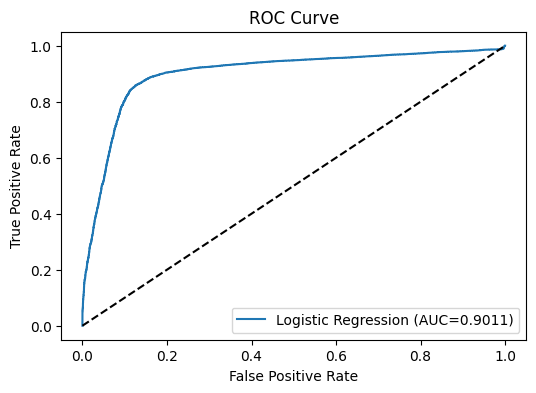

In [32]:
# 5. ROC Curve
# ---------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={roc_auc:.4f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,          # let trees grow fully
    random_state=42,
    n_jobs=-1,               # use all cores
    class_weight="balanced"  # handle imbalance
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# Evaluate
print("Classification Report (Random Forest, Test Set):")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

roc_auc = roc_auc_score(y_test, y_prob_rf)
print(f"\nROC-AUC Score: {roc_auc:.4f}")


Classification Report (Random Forest, Test Set):
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      6887
           1       0.99      0.96      0.98     20153

    accuracy                           0.97     27040
   macro avg       0.94      0.97      0.96     27040
weighted avg       0.97      0.97      0.97     27040


Confusion Matrix:
[[ 6764   123]
 [  800 19353]]

ROC-AUC Score: 0.9913


In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1]))  # handle imbalance
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report (XGBoost, Test Set):")
print(classification_report(y_test, y_pred_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))


Classification Report (XGBoost, Test Set):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6887
           1       1.00      0.95      0.97     20153

    accuracy                           0.96     27040
   macro avg       0.94      0.97      0.95     27040
weighted avg       0.96      0.96      0.96     27040


Confusion Matrix:
[[ 6791    96]
 [  956 19197]]

ROC-AUC Score: 0.9913830821916707
